# Psych 45: Stroop stats

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='poster', font_scale=1.5)

## Import data file

In [2]:
data = pd.read_csv('/Users/annakhazenzon/Documents/teaching/psych45/Psych45/WWW/demo_files/Psych45_stroop_stats_2017.csv')
data.drop('when', axis=1, inplace=True)

data.time_normal = data.time_normal.str.strip(' ms').str.replace(',', '').astype(float)
data.time_interfere = data.time_interfere.str.strip(' ms').str.replace(',', '').astype(float)

data['time_diff'] = data.time_interfere - data.time_normal

#### Remove outliers

In [3]:
max_rt = data.time_interfere.mean() + 2*data.time_interfere.std()
data = data.loc[data.time_interfere < max_rt]

In [4]:
data.head()

,pct_correct,time_normal,time_interfere,time_diff
0,100.0,603.61,873.47,269.86
1,100.0,842.58,1286.07,443.49
2,100.0,673.37,1100.48,427.11
3,100.0,1089.52,1210.64,121.12
4,100.0,1004.44,1149.34,144.90


## Analyses

#### Summary stats

In [5]:
data.describe()

,pct_correct,time_normal,time_interfere,time_diff
count,52.000000,52.000000,52.000000,52.000000
mean,96.877308,932.745000,1147.618077,214.873077
std,3.935884,209.726486,206.822008,208.334020
min,85.000000,603.610000,787.770000,-473.790000
25%,95.240000,814.987500,1031.130000,111.525000
50%,97.825000,881.405000,1134.630000,207.745000
75%,100.000000,1027.152500,1220.665000,320.887500
max,100.000000,1897.750000,1939.030000,877.780000


### What is the distribution of overall accuracy?

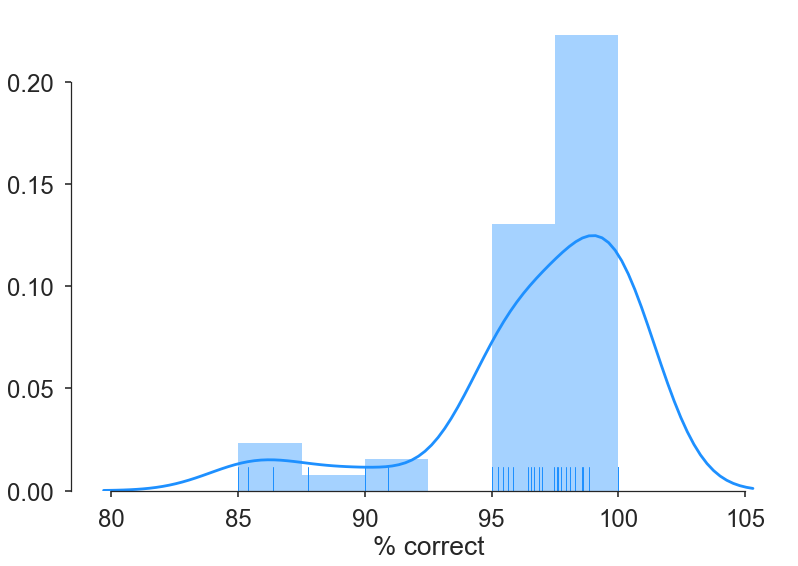

In [6]:
g = sns.distplot(data.pct_correct, rug=True,
                 color='dodgerblue')
g.set_xlabel('% correct')
sns.despine(trim=True)

### How does condition affect response time?

In [7]:
data_long = pd.melt(data, ['pct_correct'])
data_long = data_long.loc[data_long.variable.isin(['time_normal', 'time_interfere'])]
data_long.loc[data_long.variable == 'time_normal', 'variable'] = 'congruent'
data_long.loc[data_long.variable == 'time_interfere', 'variable'] = 'incongruent'

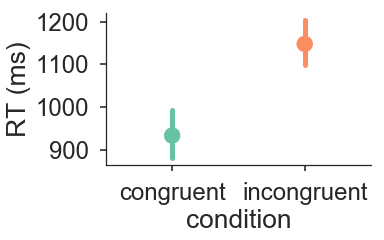

In [8]:
g = sns.factorplot(x='variable', y='value', 
                   aspect=1.5, ci=95,
                   data=data_long, palette='Set2')
g.set_ylabels('RT (ms)')
g.set_xlabels('condition')
plt.locator_params(nbins=5)

### What is the distribution of RTs for incongruent vs. congruent trials?

How much *longer* does it take to respond to an incongruent vs. a congruent trial?

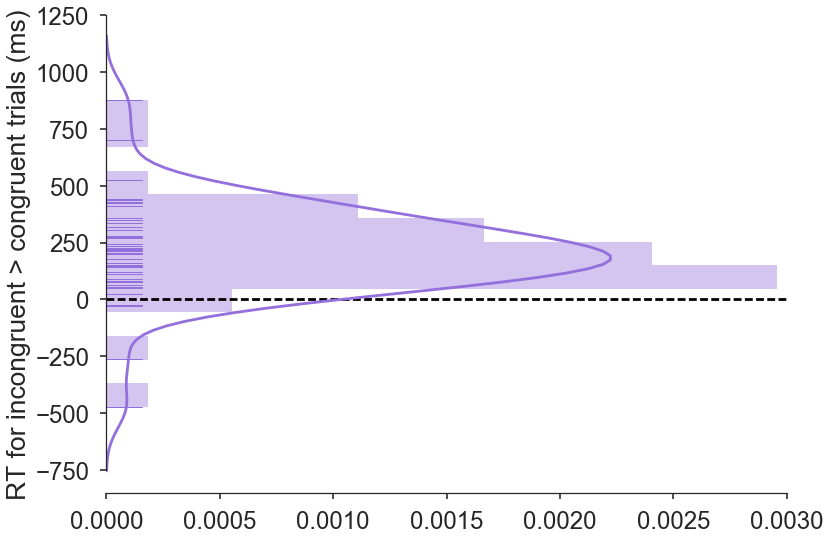

In [9]:
g = sns.distplot(data.time_diff, rug=True, 
                 color='mediumpurple', vertical=True)
g.set_ylabel('RT for incongruent > congruent trials (ms)')
g.hlines(0, 0, .003, linestyles='dashed')
sns.despine(trim=True)